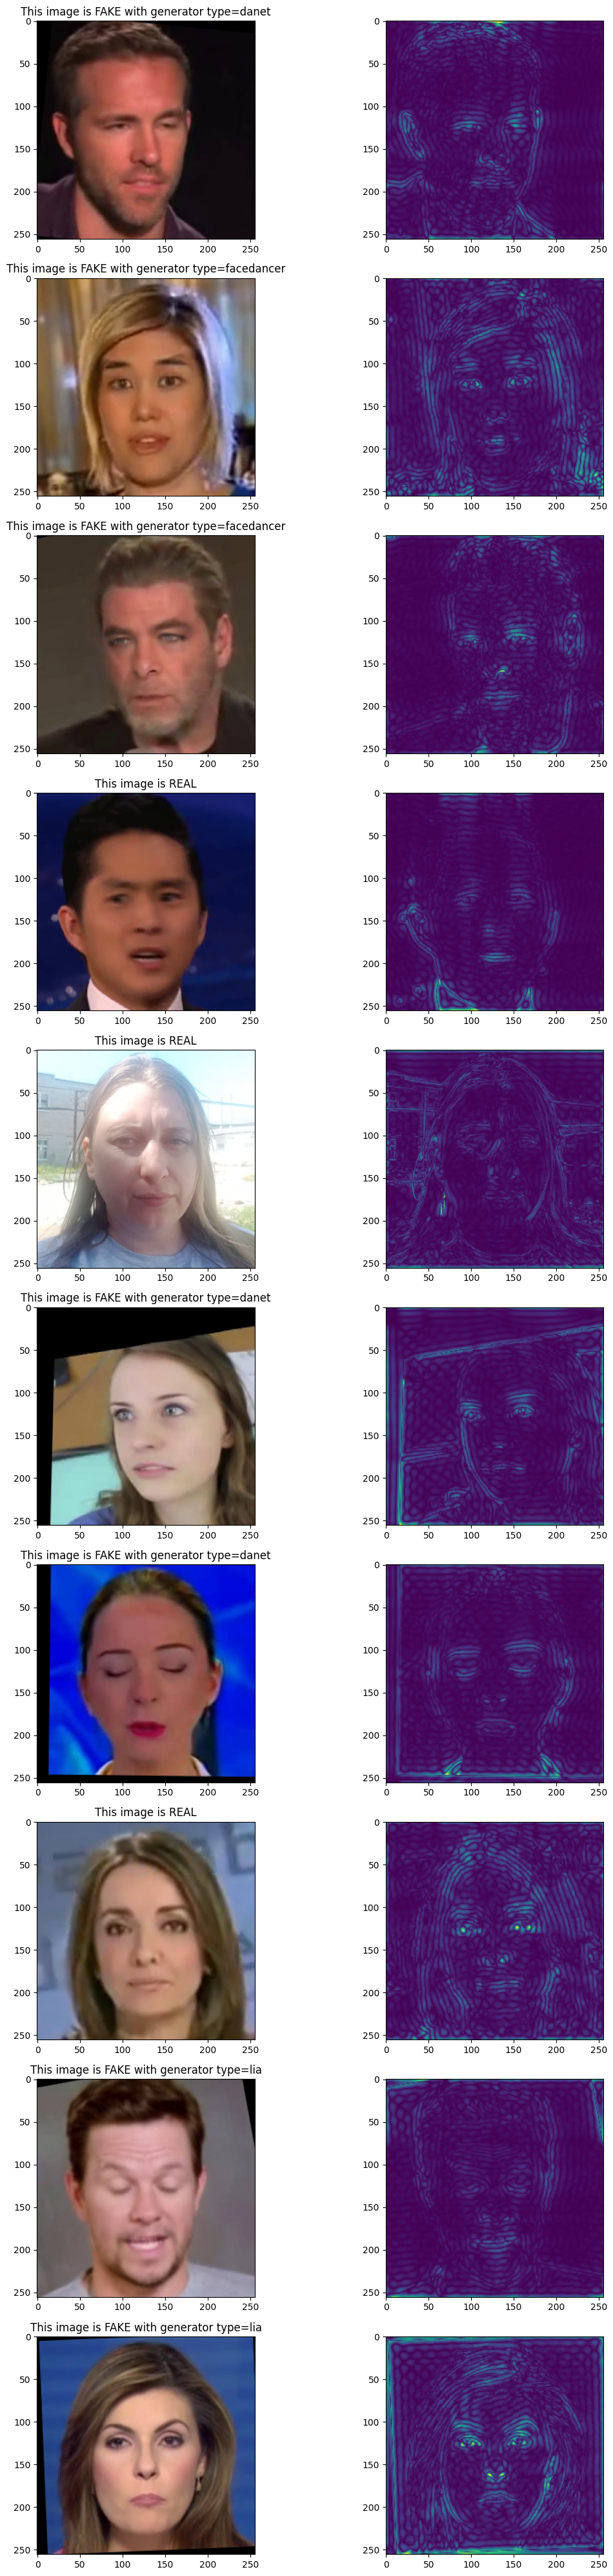

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from data import _fft_amp_channel, FaceDeepfakeDataset

ds = FaceDeepfakeDataset(csv_file='train.csv', root_dir='./train', is_test=False)
df = ds.df
N = 10
plt.figure(figsize=(16, 40))
for i in range(N):
    sample_img = df.sample()
    img_path = './train/' + sample_img.crop_path.item()
    label = sample_img.label.item()
    fake_type = sample_img.fake_type.item()
    
    img_type = 'REAL' if label else 'FAKE'
    fake_type = '' if label else f' with generator type={fake_type}'
    
    img = Image.open(img_path)
    plt.subplot(N, 2, 2*i+1)
    plt.imshow(img)
    plt.tight_layout()
    plt.title(f'This image is {img_type}' + fake_type)
    
    plt.subplot(N, 2, 2*i+2)
    freq = _fft_amp_channel(img)
    plt.imshow(freq)
    plt.tight_layout()